<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#군집분석-과제" data-toc-modified-id="군집분석-과제-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>군집분석 과제</a></span></li></ul></div>

# 군집분석 과제 

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("USArrests.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


위의 데이터에서 Murder	Assault	UrbanPop	Rape를 가지고 아래와 같이  K-means 군집분석을 진행하세요 
- 1) 최적의 k 값 찾으세요. 
- 2) 콜린스키하라바츠스코어 구하세요. 
- 3) SSE구하세요 
- 4) 군집분석한 결과를 해석하세요 

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

In [6]:
new_df = df.drop("Unnamed: 0", axis = 1)

In [7]:
cnt = 1
for i in range(2,11):
    cnt += 1
    km = KMeans(n_clusters= i, random_state = 1)
    km.fit(new_df)
    labels = km.labels_
    
    chs = calinski_harabasz_score(new_df, labels)
    print("n_cluster 가 {} 일때  :{}".format(cnt, chs))    

n_cluster 가 2 일때  :129.16750641095095
n_cluster 가 3 일때  :150.82736111645258
n_cluster 가 4 일때  :141.76241251642008
n_cluster 가 5 일때  :152.68636141181392
n_cluster 가 6 일때  :158.03230599203238
n_cluster 가 7 일때  :156.2208581572518
n_cluster 가 8 일때  :154.16122402657848
n_cluster 가 9 일때  :158.78597024253023
n_cluster 가 10 일때  :151.79965831957094


In [8]:
# n_cluster 가 9일때 학습

km = KMeans(n_clusters= 9, random_state = 1)
km.fit(new_df)
labels = km.labels_

In [9]:
new_df["k_cluster"] = labels

In [10]:
# 엘보우 기법을 통해 다시한번 최적의 n_cluster 확인

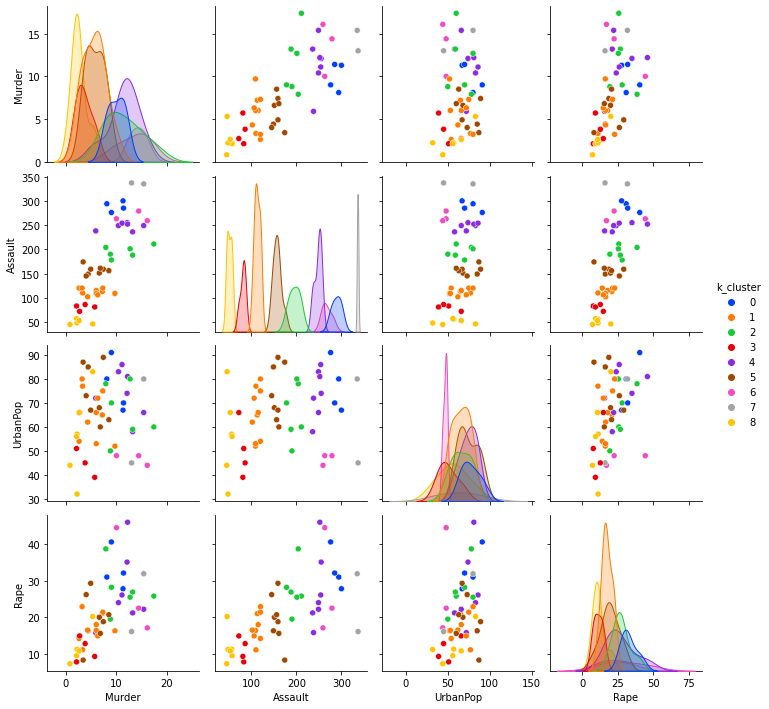

In [11]:
import seaborn as sns

sns.pairplot(new_df, hue = "k_cluster", palette = "bright")

In [12]:
import matplotlib.pyplot as plt

def elbow(df):
    sse = []
    for i in range(1,11):
        km = KMeans(n_clusters= i, random_state = 1)
        km.fit(df)
        sse.append(km.inertia_)
    
    plt.xlim(1,10)
    plt.plot(range(1,11), sse)
    
        

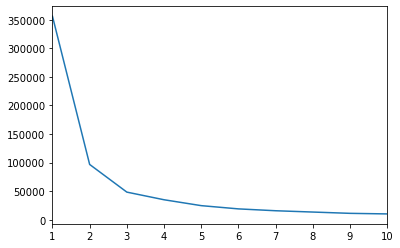

In [13]:
elbow(new_df)

In [14]:
# n_cluster 를 3으로 해서 다시 시각화

new_df.drop("k_cluster", axis = 1, inplace = True)

In [15]:
km = KMeans(n_clusters= 3, random_state = 1)
km.fit(new_df)
labels = km.labels_

In [16]:
new_df["cluster_3"] = labels

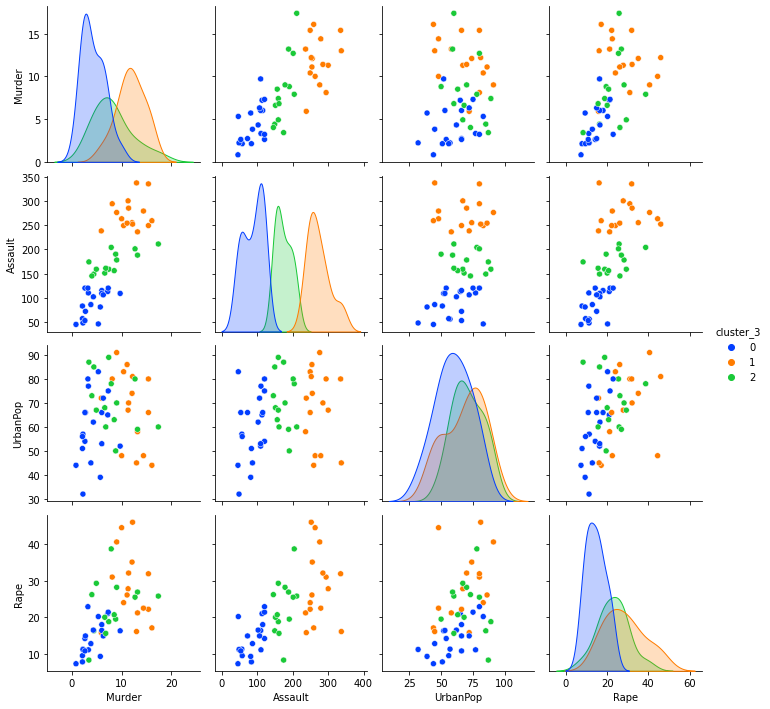

In [17]:
sns.pairplot(new_df, hue = "cluster_3", palette= "bright") #n_cluster 가 3일때 괜찮게 분류가됨

In [18]:
new_df.groupby("cluster_3").mean()

,Murder,Assault,UrbanPop,Rape
cluster_3,,,,
0,4.270000,87.550000,59.750000,14.390000
1,11.812500,272.562500,68.312500,28.375000
2,8.214286,173.285714,70.642857,22.842857


0번 으로 군집화 된 지역은 범죄율이 낮게 일어나므로 살기좋은 지역이다
1번 으로 군집화된 지역은 범죄가 세 지역중 가장많이 일어나는 지역으로 살기에 적합하지 않다
2번 지역은 범죄가 어느정도 일어나는 지역이므로 많은 유의가 필요할것으로 보인다

## 혼합 분포 군집

In [19]:
# 최대우도 계산법
# https://everyday-image-processing.tistory.com/30

In [20]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [21]:
iris = pd.read_csv("iris.csv")
iris.head(3)
iris = iris.drop("variety", axis = 1)

In [22]:
# 혼합분포는 이상치에 민감하므로 정규화 수행

scaler = StandardScaler()
scaler = scaler.fit_transform(iris)
scaler = pd.DataFrame(data = scaler, columns = iris.columns)

In [23]:
scaler

,sepal.length,sepal.width,petal.length,petal.width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [24]:
# 가우시안 혼합모델 구축

gmm = GaussianMixture(n_components= 3)
labels = gmm.fit(scaler)
labels = gmm.predict(scaler)

iris["gmm_cluster"] = labels

In [25]:
iris["gmm_cluster"].value_counts()

2    55
0    50
1    45
Name: gmm_cluster, dtype: int64

In [26]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,gmm_cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
iris["gmm_cluster"].value_counts()

2    55
0    50
1    45
Name: gmm_cluster, dtype: int64

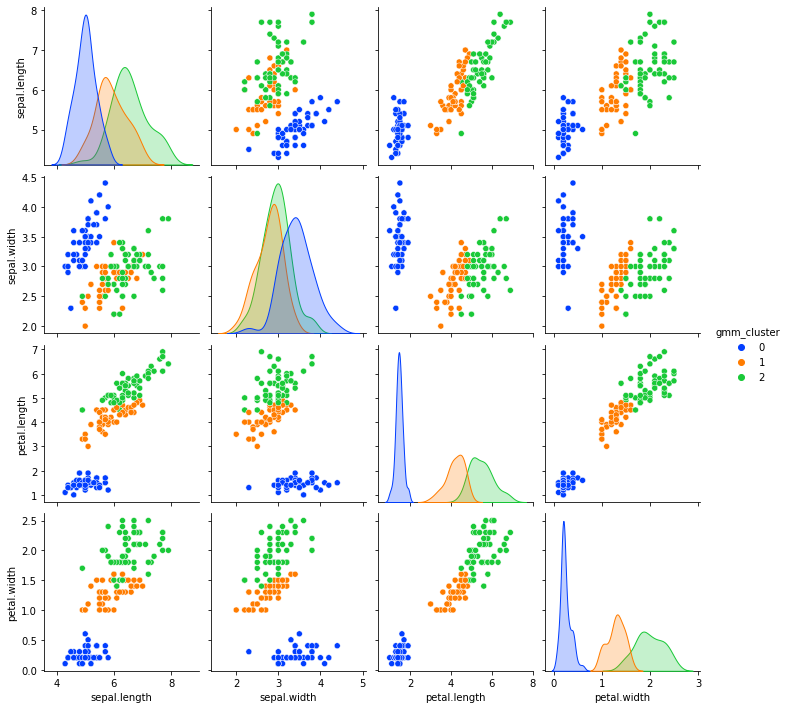

In [28]:
import seaborn as sns

sns.pairplot(iris, hue = "gmm_cluster", palette= "bright")

In [29]:
# a = pd.DataFrame(data = {"a": [1,2,3], "b":[4,5,6],"c":[7,8,9]}, index = ["one","two","three"])
# a["target"] = [1,2,3]
# a["hi"] = 0

In [30]:
# 해석
iris.groupby("gmm_cluster").mean()

,sepal.length,sepal.width,petal.length,petal.width
gmm_cluster,,,,
0,5.006000,3.428000,1.462000,0.246000
1,5.904444,2.775556,4.193333,1.293333
2,6.554545,2.950909,5.489091,1.989091


In [31]:
iris = pd.read_csv("iris.csv")
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


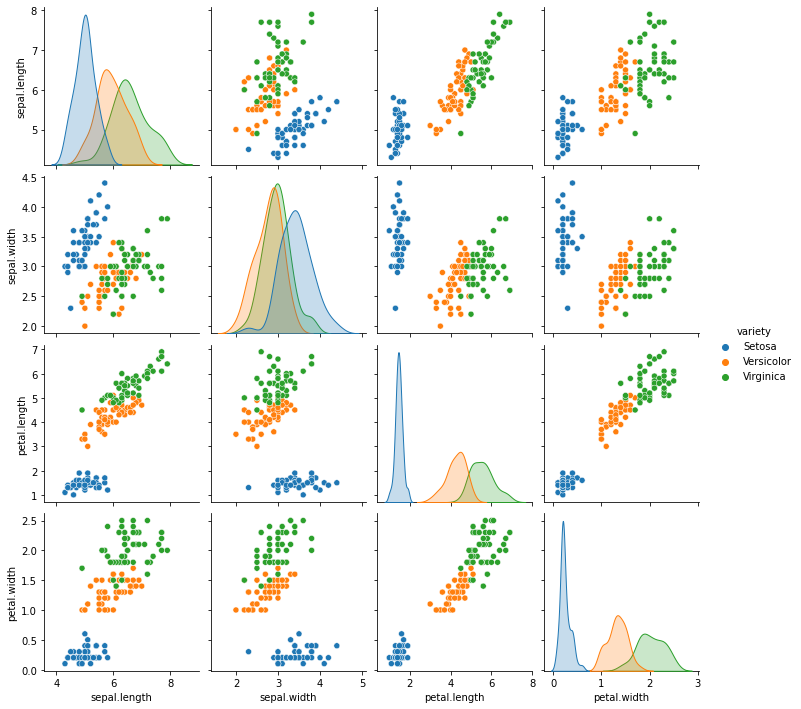

In [32]:
sns.pairplot(iris, hue = "variety")

## 자기조직화 지도(SOM)

In [57]:
iris = pd.read_csv("iris.csv")
iris.head()

target = iris["variety"]

In [58]:
iris.drop("variety", axis = 1, inplace = True)

In [59]:
# SOM 은 이상치에 민감하므로 정규화를 시켜줘야함

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_df = scaler.fit_transform(iris)

In [60]:
from sklearn_som.som import SOM

iris_som = SOM(m = 3, n = 1, dim = 4)
iris_som.fit(scaler_df)

In [61]:
prediction = iris_som.predict(scaler_df)

In [62]:
iris["som_target"] = prediction 

In [39]:
iris["som_target"].value_counts()

2    66
0    50
1    34
Name: som_target, dtype: int64

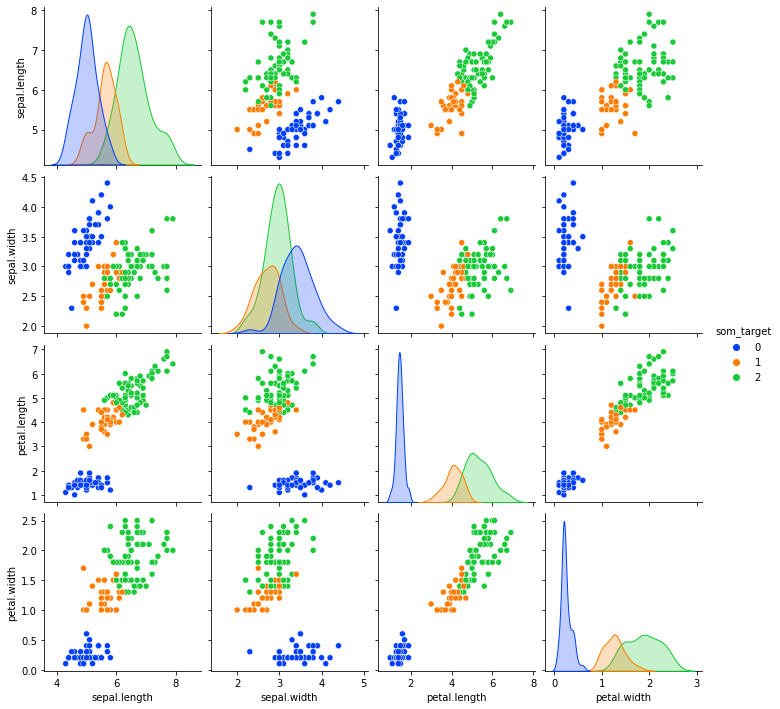

In [40]:
import seaborn as sns

sns.pairplot(iris, hue = "som_target",palette = "bright")

### 17회 군집문제 기출

In [41]:
# 데이터를 7:3 으로 나누어라
# train 데이터셋을 som 알고리즘으로 군집화하고 test 데이터에 대한 오분류표를 구하라

In [81]:
df = pd.read_csv("iris.csv")
target = df["variety"]

In [82]:
df.drop("variety",axis = 1, inplace = True)

In [83]:
from sklearn.model_selection import train_test_split
from sklearn_som.som import SOM

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.3, stratify= target)

In [84]:
X_train = X_train.values 
X_test = X_test.values

In [85]:
som = SOM(m = 3, n = 1, dim = 4) # 넘파이 형태로 들어가야함
som.fit(X_train)

In [86]:
pred = som.predict(X_test)

In [87]:
result = pd.DataFrame()
result["y_test"] = y_test
result["y_pred"] = pred

In [49]:
def cat(df):
    cat = ""
    if df == "Setosa":
        cat = 0
    elif df == "Virginica":
        cat = 2
    else:
        cat = 1
        
    return cat


In [50]:
tmp_list = []
for df in result["y_test"].values:
    if df == "Setosa":
        df = 0
    elif df == "Virginica":
        df = 2
    else:
        df = 1 
        
    tmp_list.append(df)
    
tmp_list

[2,
 1,
 0,
 2,
 0,
 0,
 0,
 2,
 1,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 1,
 1,
 1,
 0]

In [51]:
result["y_test_int"] = result["y_test"].apply(lambda x : cat(x))

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [53]:
accuracy = accuracy_score(result["y_test_int"], result["y_pred"])

In [54]:
confusion = confusion_matrix(result["y_test_int"], result["y_pred"])
confusion

array([[15,  0,  0],
       [ 0,  9,  6],
       [ 0,  0, 15]], dtype=int64)

In [55]:
from sklearn.metrics import classification_report

report = classification_report(result["y_test_int"], result["y_pred"])

In [56]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.60      0.75        15
           2       0.71      1.00      0.83        15

    accuracy                           0.87        45
   macro avg       0.90      0.87      0.86        45
weighted avg       0.90      0.87      0.86        45

